In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

In [50]:
Boston = pd.read_csv('datasets/train.csv')

In [29]:
Boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [31]:
Boston.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [32]:
Boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


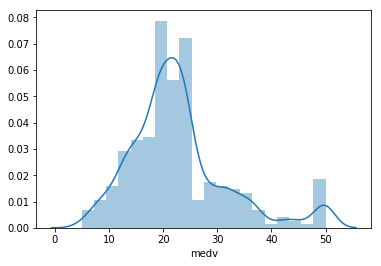

In [34]:
sns.distplot(Boston['medv'], bins=20)

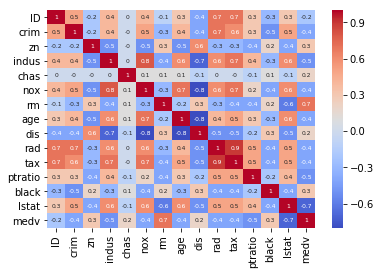

In [36]:
sns.heatmap(data=Boston.corr().round(1), cmap='coolwarm', annot=True, annot_kws={"size":6})

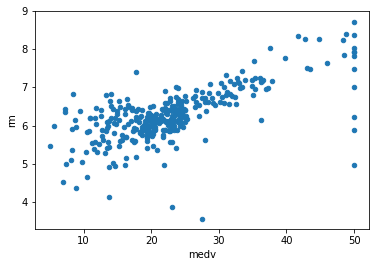

In [39]:
Boston.plot.scatter(x='medv', y='rm')

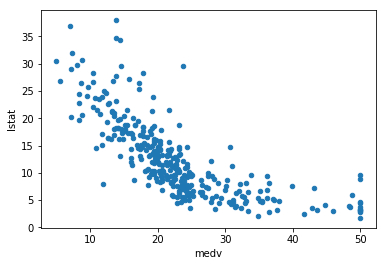

In [40]:
Boston.plot.scatter(x='medv', y='lstat')

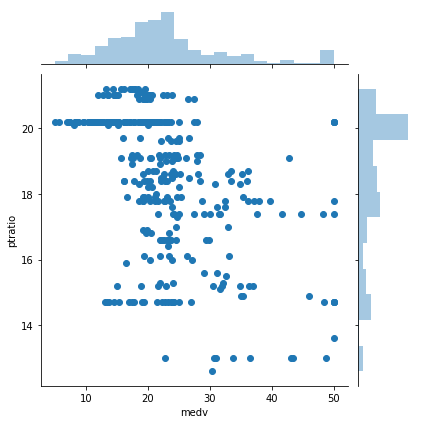

In [43]:
sns.jointplot(x='medv', y='ptratio', data=Boston)

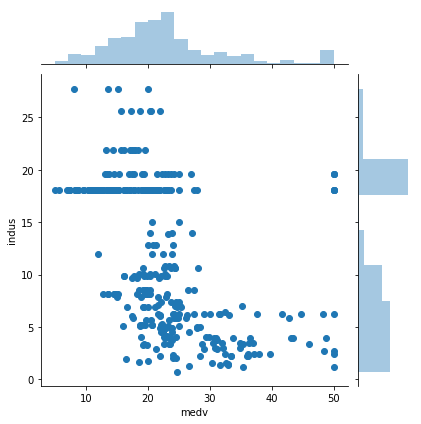

In [44]:
sns.jointplot(x='medv', y='indus', data=Boston)

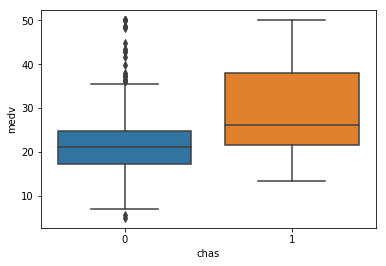

In [47]:
sns.boxplot(x='chas', y='medv', data=Boston)

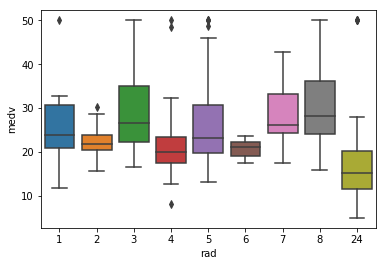

In [48]:
sns.boxplot(x='rad', y='medv', data=Boston)

In [65]:
model = smf.ols(
    'medv ~ rm + lstat + ptratio + indus + age + nox + + rad + chas',
    data=Boston
).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     88.22
Date:                Thu, 16 May 2019   Prob (F-statistic):           1.05e-76
Time:                        20:37:49   Log-Likelihood:                -1017.5
No. Observations:                 333   AIC:                             2053.
Df Residuals:                     324   BIC:                             2087.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7885      5.883      4.384      0.000      14.216      37.361
rm             3.9349      0.549      7.169      0.000       2.855       5.015
lstat         -0.6640      0.065    -10.157      0.000      -0.793      -0.535
ptratio       -0.9548      0.170     -5.625      0.000      -1.289      -0.621
indus          0.0467      0.070      0.672      0.502      -0.090       0.183
age            0.0307      0.016      1.881      0.061      -0.001       0.063
nox          -10.1134      4.948     -2.044      0.042     -19.847      -0.379
rad            0.1025      0.047      2.166      0.031       0.009       0.196
chas           4.5693      1.228      3.720      0.000       2.153       6.986
==============================================================================
Omnibus:                      122.888   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.494
Skew:                           1.597   Prob(JB):                     1.23e-99
Kurtosis:                       7.757   Cond. No.                     1.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

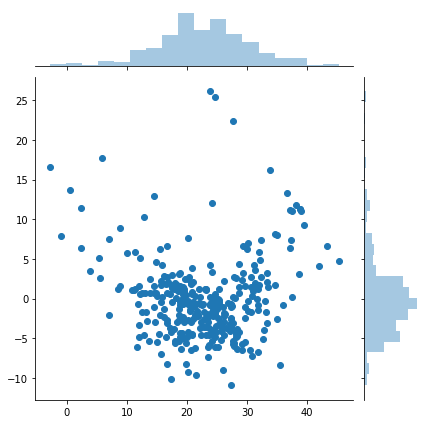

In [69]:
sns.jointplot(model.fittedvalues, model.resid)

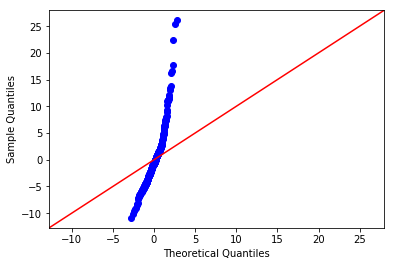

In [67]:
qqplot(model.resid, line='45');

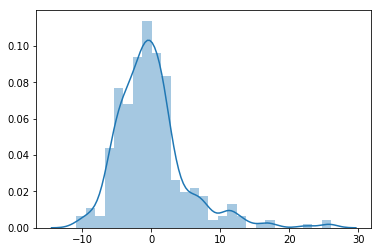

In [68]:
sns.distplot(model.resid)